In [1]:
MAKE_BOOK_FIGURES=Trueimport numpy as npimport scipy.stats as stimport matplotlib as mplimport matplotlib.pyplot as plt%matplotlib inlineimport matplotlib_inlinematplotlib_inline.backend_inline.set_matplotlib_formats('svg')import seaborn as snssns.set_context("paper")sns.set_style("ticks")def set_book_style():    plt.style.use('seaborn-v0_8-white')     sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings        'font.family': 'serif',  # For academic publishing        'font.size': 8,  # As requested, 10pt font        'axes.labelsize': 8,        'axes.titlesize': 8,        'xtick.labelsize': 7,  # Slightly smaller for better readability        'ytick.labelsize': 7,        'legend.fontsize': 7,                # Line and marker settings for consistency        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout to prevent clipped labels        'figure.constrained_layout.use': True,                # Default DPI (will override when saving)        'figure.dpi': 600,        'savefig.dpi': 600,                # Despine - remove top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional trim settings        'figure.autolayout': True,  # Alternative to constrained_layout        'savefig.bbox': 'tight',    # Trim when saving        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off    })def set_notebook_style():    plt.style.use('seaborn-v0_8-white')    sns.set_style("ticks")    sns.set_palette("deep")    mpl.rcParams.update({        # Font settings - using default sizes        'font.family': 'serif',        'axes.labelsize': 10,        'axes.titlesize': 10,        'xtick.labelsize': 9,        'ytick.labelsize': 9,        'legend.fontsize': 9,                # Line and marker settings        'axes.linewidth': 0.5,        'grid.linewidth': 0.5,        'lines.linewidth': 1.0,        'lines.markersize': 4,                # Layout settings        'figure.constrained_layout.use': True,                # Remove only top and right spines        'axes.spines.top': False,        'axes.spines.right': False,                # Remove legend frame        'legend.frameon': False,                # Additional settings        'figure.autolayout': True,        'savefig.bbox': 'tight',        'savefig.pad_inches': 0.1    })def save_for_book(fig, filename, is_vector=True, **kwargs):    """    Save a figure with book-optimized settings.        Parameters:    -----------    fig : matplotlib figure        The figure to save    filename : str        Filename without extension    is_vector : bool        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.    **kwargs : dict        Additional kwargs to pass to savefig    """        # Set appropriate DPI and format based on figure type    if is_vector:        dpi = 1000        ext = '.pdf'    else:        dpi = 600        ext = '.tif'        # Save the figure with book settings    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)def make_full_width_fig():    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)def make_half_width_fig():    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)if MAKE_BOOK_FIGURES:    set_book_style()else:    set_notebook_style()make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

# The Principle of Maximum Entropy for Continuous Random Variables

## Maximum Entropy Code

Writing generic code for finding the maximum entropy distribution in continuous cases is a lot of work.
Instead, we will use the [PyMaxEnt](https://www.sciencedirect.com/science/article/pii/S2352711019302456) Python module.
This module is not set up for installation via pip, so we will have to do some manual work.
All the code is contained in a single file called ``pymaxent.py`` which you can find [here](https://raw.githubusercontent.com/saadgroup/PyMaxEnt/master/src/pymaxent.py).
All we need to do is make this file visible from the current working directory of this Jupyter Notebook.
We could give OS-specific instructions on how to do this, but in Python, you could do it as follows:

In [2]:
url = 'https://raw.githubusercontent.com/saadgroup/PyMaxEnt/master/src/pymaxent.py'
download(url)

After running the code above you should be able to import the library:

In [3]:
# If this fails, please make sure you follow the instructions above to download the file
from pymaxent import *

## Examples of maximum entropy distributions

We work in a 1D random variable setting.
The code by Saad requires that you specify the interval support of the distribution, i.e., an interval $[a,b]$ outside of which the probability density function should be zero, and the $M$ *moments* of the distribution, i.e.,

$$
\mathbb{E}[X^m] = \mu_m,
$$

for $m=0,\dots,M$.
Then, the maximum entropy distribution that satisfies these constraints is given by:

$$
p(x) = 1_{[a,b]}(x)\exp\left\{\sum_{m=1}^M\lambda_mx^m\right\},
$$

where the $\lambda_0,\dots,\lambda_M$ are fitted so that the constraints are satisfied.
Note that there is no need for the normalization constant here because it has been absorbed in $\lambda_0$.
Let's do some examples to gain some intuition.

### No constraints in [-1,1]
The support is $[-1,1]$, and there are no moment constraints.
You only have to specify the normalization constraint and the bounds:

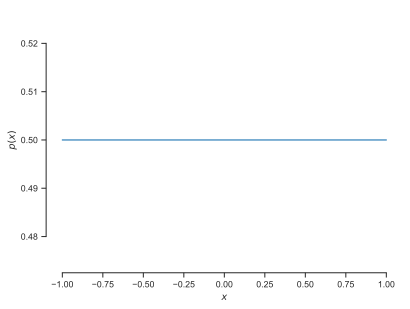

In [5]:
mu = [1.0]
pdf, lambdas = reconstruct(mu, bnds=[-1.0, 1.0])

# plot the reconstructed solution
x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
sns.despine(trim=True);

## Mean constraint [-1,1]
Same as before, but we are now going to impose a mean constraint:

$$
\mathbb{E}[X] = \mu.
$$

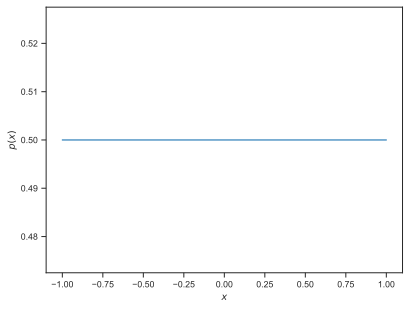

In [8]:
mu = [1.0, # The required normalization constraint
      0.0] # The mean constraint

pdf, lambdas = reconstruct(mu, bnds=[-1.0, 1.0])

# plot the reconstructed solution
x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$');

### Questions

+ Modify the mean to $\mu=0.1$ and observe the resulting maximum entropy pdf.
+ Modify the mean to $\mu=-0.1$ and observe the resulting maximum entropy pdf.
+ Try $\mu=0.9$. What happens to the maximum entropy pdf?
+ Try $\mu=1.1$. Why does the code break down?

## Variance constraint
In addition to the mean constraint, we now include a variance constraint:

$$
\mathbb{V}[X] = \sigma^2.
$$

However, note that ``PyMaxEnt`` works only with moment constraints.
Therefore, we must connect the variance to the second and first moments.
Here is how to do this:

$$
\mathbb{E}[X^2] = \mathbb{V}[X] + \left(\mathbb{E}[X]\right)^2 = \sigma^2 + \mu^2.
$$

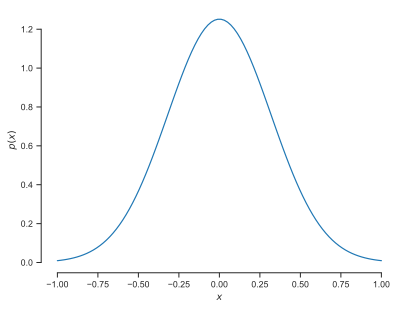

In [9]:
mu = 0.0
sigma2 = 0.1
mus = [
    1.0, # The required normalization constraint
    mu,  # The mean constraint
    sigma2 + mu ** 2
] # The second moment constraint 

pdf, lambdas = reconstruct(mus, bnds=[-1.0, 1.0])

# plot the reconstructed solution
x = np.linspace(-1.0, 1.0, 100)

fig, ax = plt.subplots()
ax.plot(x, pdf(x))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
sns.despine(trim=True);

### Questions

+ Modify the variance to $\sigma^2=0.3$ and observe the resulting maximum entropy pdf.
+ Modify the variance to $\sigma^2=0.4$ and observe the resulting maximum entropy pdf. Why did you get this abrupt change?
+ Try $\sigma^2=1$. Why does the code break down?